CODSOFT INTERNSHIP TASK 3: SALES PREDICTION 

Intern - Aditya Singh Rautela

Domain - Data science

In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Data collection and loading

In [2]:
data=pd.read_csv('advertising.csv')#importing dataset

In [3]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.isnull().sum()#no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.shape

(200, 4)

Data Visualization



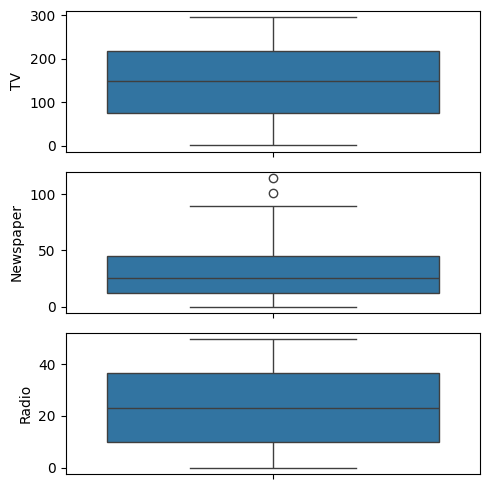

In [8]:
#outlier analysis
fig,axis=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(data['TV'],ax=axis[0])
plt2=sns.boxplot(data['Newspaper'],ax=axis[1])
plt3=sns.boxplot(data['Radio'],ax=axis[2])
plt.tight_layout()

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

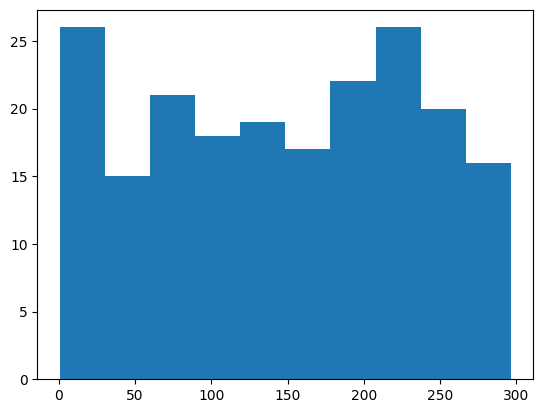

In [9]:
plt.hist(x=data['TV'])

<Axes: >

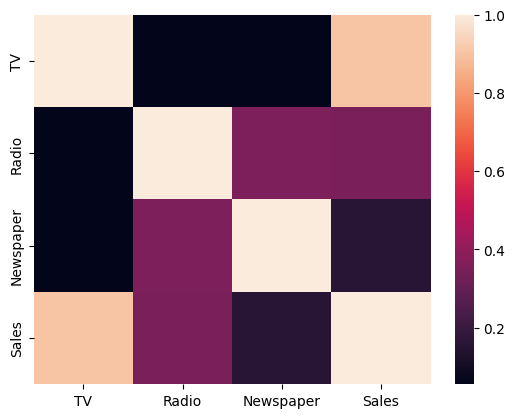

In [10]:
sns.heatmap(data.corr())#to observe the realtion among the columns

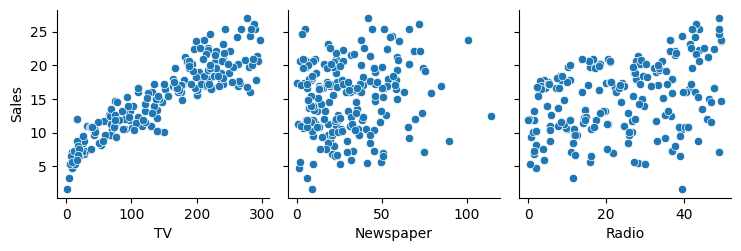

In [11]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'])

Spliting the data into test data and train data 

In [12]:
#we analised that newspaper doesn't have a major role in sales prediction so we droped it
x=data[['TV','Radio']]
y=data['Sales']#target coloumn

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
x_train.head()

,TV,Radio
147,243.2,49.0
118,125.7,36.9
117,76.4,0.8
60,53.5,2.0
16,67.8,36.6


In [15]:
y_train.head()

147    25.4
118    15.9
117     9.4
60      8.1
16     12.5
Name: Sales, dtype: float64

Logistic regression and model training


In [16]:
model=LinearRegression()
model.fit(x_train,y_train)
model_predict=model.predict(x_train)

In [17]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [18]:
y_pred=model.predict(x_test)
MAE=mean_absolute_error(y_test,y_pred)
MAE_TRAIN=mean_absolute_error(y_train,model_predict)
print("Mean Absolute error of testing data: " ,MAE)
print("Mean Absolute error of training data: " ,MAE_TRAIN)

Mean Absolute error of testing data:  0.9591250534816684
Mean Absolute error of training data:  1.3191188888047827


In [19]:
MSE=mean_squared_error(y_test,y_pred)
MSE_TRAIN=mean_absolute_error(y_train,model_predict)
print("Mean Absolute error of testing data: ", MSE)
print("Mean Squared error of training data: " ,MSE_TRAIN)

Mean Absolute error of testing data:  1.7175736187481874
Mean Squared error of training data:  1.3191188888047827


In [20]:
R2=r2_score(y_test,y_pred)
R2_train=r2_score(y_train,model_predict)
print("R2 score of testing data: " ,R2 )
print("R2 score of training data: " ,R2_train )

R2 score of testing data:  0.9457086741295516
R2 score of training data:  0.8891523362290139


In [21]:
import warnings
warnings.filterwarnings("ignore")
def check_sales(data):
    new_data=pd.DataFrame(data)
    sales=model.predict(new_data)
    print("Sales : ", sales)

In [24]:
check_sales(data=[[230.1,35.8]])

Sales :  [20.90851832]
